In [1]:
#https://www.kaggle.com/htagholdings/property-sales

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [3]:
movingaverage = pd.read_csv('ma_lga_12345.csv')

In [4]:
_2bdrm_house=movingaverage[(movingaverage['type']=='house') & (movingaverage['bedrooms']==2)]
_2bdrm_house['saledate']=pd.to_datetime(_2bdrm_house['saledate'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
_data=_2bdrm_house.sort_values('saledate')['MA']
X=_data[:-1]
y=_data[1:]

<AxesSubplot:>

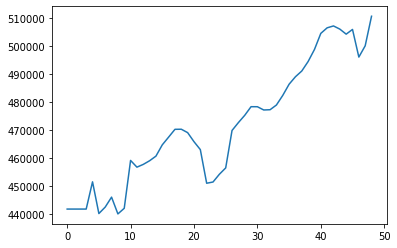

In [6]:
_data.plot()

In [16]:
X = np.array(X)
X

array([441854, 441854, 441854, 441854, 451583, 440256, 442566, 446113,
       440123, 442131, 459222, 456822, 457806, 459109, 460758, 464788,
       467546, 470333, 470365, 469149, 465919, 463090, 451077, 451516,
       454270, 456548, 469920, 472726, 475326, 478413, 478398, 477238,
       477330, 479010, 482440, 486436, 489104, 491152, 494544, 498846,
       504592, 506578, 507248, 506116, 504318, 506001, 496133, 500158])

In [8]:
reg = linear_model.LinearRegression()

In [79]:
reg.fit(X.reshape(-1,1), y)
reg.coef_

array([0.98698968])

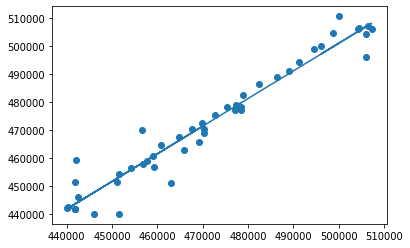

In [108]:
plt.plot(X, X*reg.coef_[0]+reg.intercept_)
plt.scatter(X, y)

In [23]:
predictions = []
for i in range(X.shape[0]):
    predictions.append(reg.predict(np.reshape(X[i], (1, -1)))[0])

In [31]:
predictions = np.array(predictions)
predictions

array([443663.00591113, 443663.00591113, 443663.00591113, 443663.00591113,
       453265.42855552, 442085.79639466, 444365.74256678, 447866.59497912,
       441954.52676657, 443936.40205385, 460805.04275846, 458436.26751471,
       459407.46536465, 460693.51292407, 462321.05891447, 466298.62734462,
       469020.74489557, 471771.48514738, 471803.0688173 , 470602.88936046,
       467414.91267824, 464622.71885966, 452766.01177496, 453199.30024663,
       455917.46983884, 458165.83234104, 471363.85840752, 474133.35146335,
       476699.52464409, 479746.36180137, 479731.5569561 , 478586.64892161,
       478677.45197262, 480335.59464326, 483720.96926246, 487664.98004332,
       490298.26852263, 492319.62339731, 495667.49240848, 499913.52203292,
       505584.76476235, 507544.92627657, 508206.20936545, 507088.93704214,
       505314.32958869, 506975.43322838, 497235.81901779, 501208.45249951])

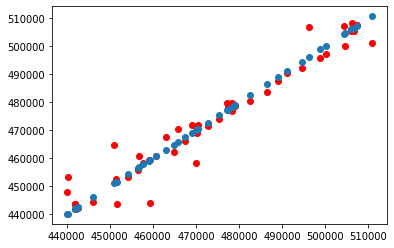

In [41]:
#2 bedroom houses
import matplotlib.pyplot as plt
plt.scatter(y, predictions, c='red')
plt.scatter(y, y)

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,predictions)
#lower MSE means more accurate

25757101.799521416

In [40]:
reg.score(X.reshape(-1,1), y)

0.9444157598502645

In [57]:
y=np.array(y)

21617604.186321456

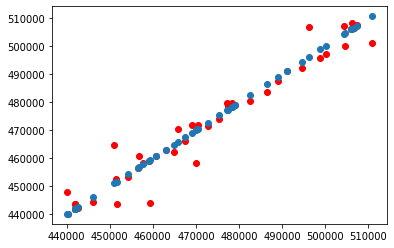

In [92]:
predictionsWithCorrections = []
for i in range(X.shape[0]):
    if(i%4==0):
        predictionsWithCorrections.append(y[i])
    else:
        predictionsWithCorrections.append(reg.predict(np.reshape(X[i], (1, -1)))[0])
plt.scatter(y, predictionsWithCorrections, c='red')
plt.scatter(y, y)
mean_squared_error(y,predictionsWithCorrections)

23077838.767582823

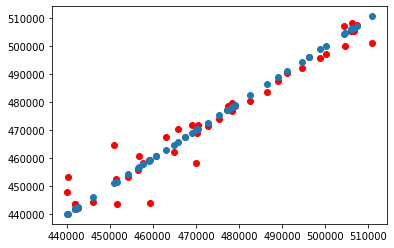

In [93]:
def correctEveryN(X, y, n):
    predictionsWithCorrections = []
    for i in range(X.shape[0]):
        if(i%n==0):
            predictionsWithCorrections.append(y[i])
        else:
            predictionsWithCorrections.append(reg.predict(np.reshape(X[i], (1, -1)))[0])
    return predictionsWithCorrections
predictionsWithCorrections = correctEveryN(X, y, 15)
plt.scatter(y, predictionsWithCorrections, c='red')
plt.scatter(y, y)
mean_squared_error(y,predictionsWithCorrections)

In [109]:
#other models
#https://scikit-learn.org/stable/modules/linear_model.html

In [111]:
reg = linear_model.BayesianRidge()
reg.fit(X.reshape(-1,1), y)
reg.coef_

array([0.98575373])

In [115]:
reg.score(X.reshape(-1,1), y)

0.9444142788867534

In [113]:
predictions = []
for i in range(X.shape[0]):
    predictions.append(reg.predict(np.reshape(X[i], (1, -1)))[0])
predictions = np.array(predictions)

25757788.06109147

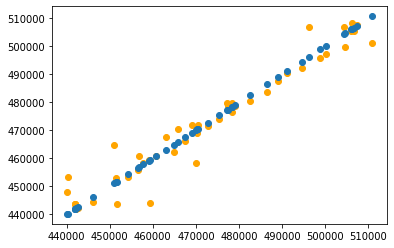

In [116]:
plt.scatter(y, predictions, c='orange')
plt.scatter(y, y)
mean_squared_error(y,predictions)

0.9444156562654923
25757149.79952137


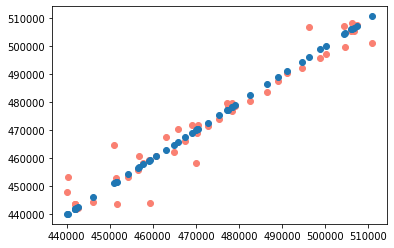

In [118]:
reg = linear_model.LassoLars()
reg.fit(X.reshape(-1,1), y)

print(reg.score(X.reshape(-1,1), y))

predictions = []
for i in range(X.shape[0]):
    predictions.append(reg.predict(np.reshape(X[i], (1, -1)))[0])
predictions = np.array(predictions)

plt.scatter(y, predictions, c='salmon')
plt.scatter(y, y)
print(mean_squared_error(y,predictions))

In [5]:
ma = np.asarray(movingaverage)

In [6]:
y = ma[:,[1]]

In [7]:
htype = ma[:,[2]]
htype = np.where(htype=='house', 0, 1)
htype = htype.astype(np.float32)

In [8]:
bedrooms = ma[:,[3]]

In [10]:
i2=np.where(bedrooms==2)
i2=i2[0][0]
i3=np.where(bedrooms==3)
i3=i3[0][0]
i4=np.where(bedrooms==4)
i4=i4[0][0]
i5=np.where(bedrooms==5)
i5=i5[0][0]
i1=np.where(bedrooms==1)
i1=i1[0][0]
# for i in range(bedrooms.size):
#     if bedrooms[i]==3:
#         i3=i
#     elif bedrooms[i]==4:
#         i4=i;
#     elif bedrooms[i]==5:
#         i5=i

In [11]:
X = movingaverage["saledate"]

In [12]:
X[0]

'30/09/2007'

In [13]:
X

0      30/09/2007
1      31/12/2007
2      31/03/2008
3      30/06/2008
4      30/09/2008
          ...    
342    30/09/2018
343    31/12/2018
344    31/03/2019
345    30/06/2019
346    30/09/2019
Name: saledate, Length: 347, dtype: object

In [14]:
import matplotlib.pyplot as plt

In [15]:
from datetime import datetime
datetime.strptime(X[0], "%d/%m/%Y")

x = np.array([datetime.strptime(X[i], "%d/%m/%Y") for i in range(X.size)])

In [16]:
x

array([datetime.datetime(2007, 9, 30, 0, 0),
       datetime.datetime(2007, 12, 31, 0, 0),
       datetime.datetime(2008, 3, 31, 0, 0),
       datetime.datetime(2008, 6, 30, 0, 0),
       datetime.datetime(2008, 9, 30, 0, 0),
       datetime.datetime(2008, 12, 31, 0, 0),
       datetime.datetime(2009, 3, 31, 0, 0),
       datetime.datetime(2009, 6, 30, 0, 0),
       datetime.datetime(2009, 9, 30, 0, 0),
       datetime.datetime(2009, 12, 31, 0, 0),
       datetime.datetime(2010, 3, 31, 0, 0),
       datetime.datetime(2010, 6, 30, 0, 0),
       datetime.datetime(2010, 9, 30, 0, 0),
       datetime.datetime(2010, 12, 31, 0, 0),
       datetime.datetime(2011, 3, 31, 0, 0),
       datetime.datetime(2011, 6, 30, 0, 0),
       datetime.datetime(2011, 9, 30, 0, 0),
       datetime.datetime(2011, 12, 31, 0, 0),
       datetime.datetime(2012, 3, 31, 0, 0),
       datetime.datetime(2012, 6, 30, 0, 0),
       datetime.datetime(2012, 9, 30, 0, 0),
       datetime.datetime(2012, 12, 31, 0, 0),
    

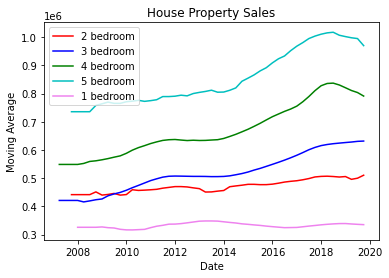

In [17]:
import matplotlib.pyplot as plt
import datetime


plt.plot(x[:i3],y[:i3],'r',label="2 bedroom")
plt.plot(x[i3:i4],y[i3:i4],'b',label="3 bedroom")
plt.plot(x[i4:i5],y[i4:i5],'g',label="4 bedroom")
plt.plot(x[i5:i1],y[i5:i1],'c',label="5 bedroom")
plt.plot(x[i1:248],y[i1:248],'violet',label="1 bedroom")
plt.legend(loc="upper left")

plt.title("House Property Sales")
plt.ylabel('Moving Average')
plt.xlabel('Date')

plt.show()

#colors
#https://matplotlib.org/stable/gallery/color/named_colors.html

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [36]:
# features
X2 = np.concatenate((htype,bedrooms), axis=1)
X2 = X2[:248, :]
X2.shape
y2 = y[:248]

In [64]:
htype

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [37]:
reg.fit(X2, y2)
reg.coef_

array([[ 30161.59642276, 130093.99390244]])

(248, 2)
(248, 1)


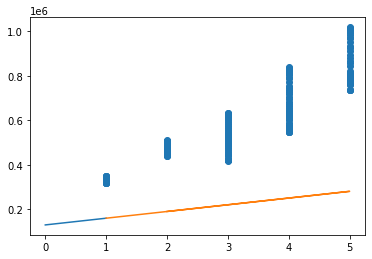

In [45]:
plt.plot(X2, X2*reg.coef_[0][0]+reg.coef_[0][1])
plt.scatter(X2[:,[1]], y2)
print(X2.shape)
print(y2.shape)

In [50]:
reg.predict(np.reshape(X2[0], (1, -1)))

array([[432656.81414634]])

In [57]:
predictions = []
for i in range(X2.shape[0]):
    predictions.append(reg.predict(np.reshape(X2[i], (1, -1))))

# TODO

predict future MA based on previous MA

# TODO

1. looking only at type house and 2 bedroom MAs, use prev MA to predict future MA
2. do the same with all house types and # bedrooms
3. correct every n values
4. try different models and compare accuracy